Solution  1


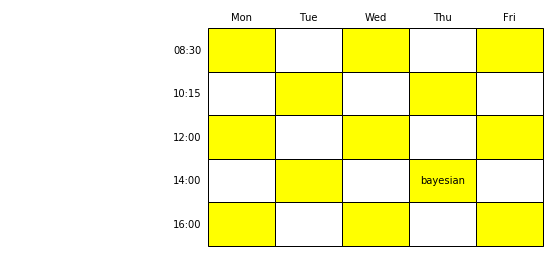

Solution  2


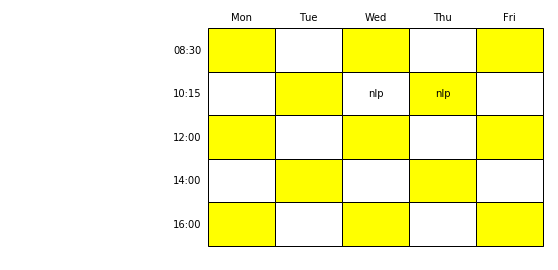

Solution  3


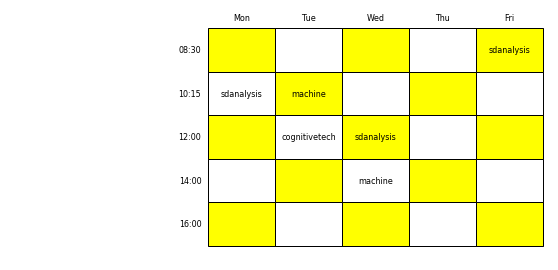

Solution  4


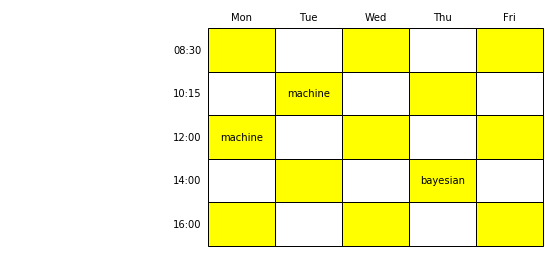

Solution  5


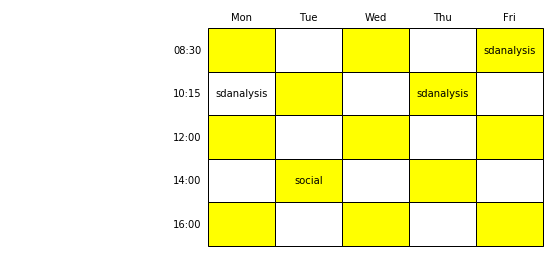

Solution  6


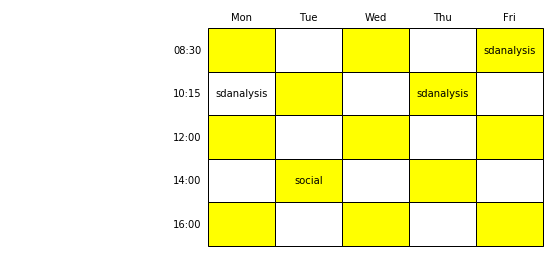

Solution  7


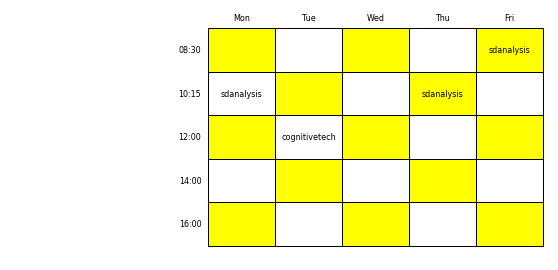

Solution  8


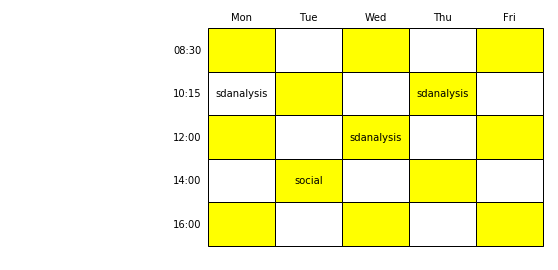

Solution  9


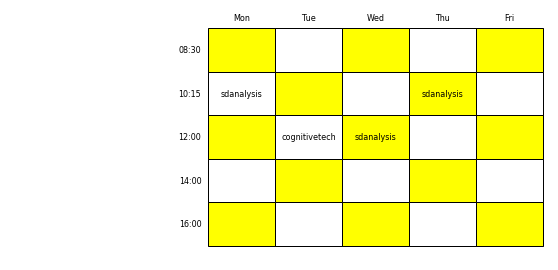

Solution  10


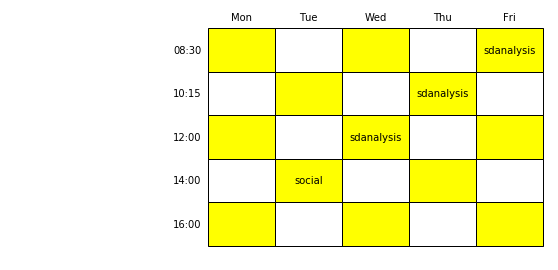

Solution  11


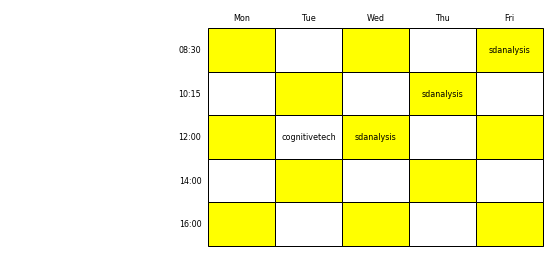

Solution  12


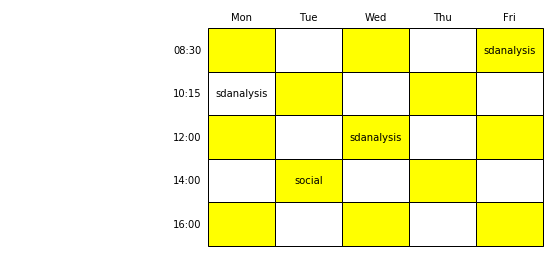

Solution  13


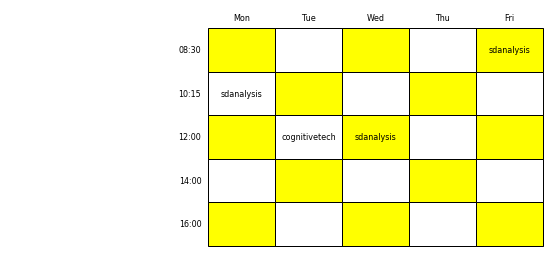

Solution  14


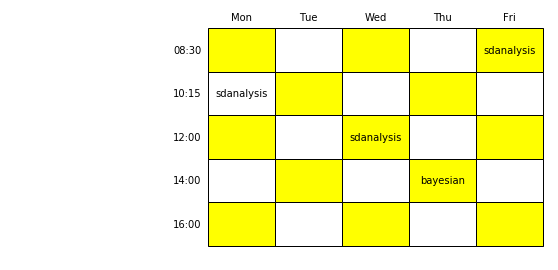

Solution  15


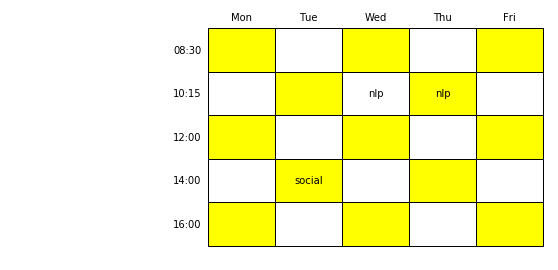

Solution  16


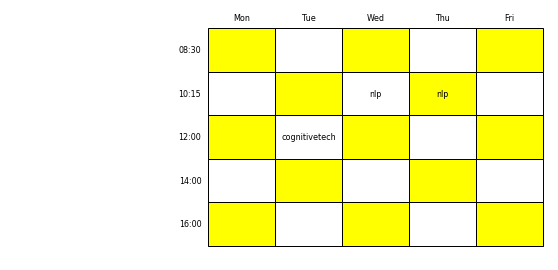

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

from matplotlib.table import Table

def main():
    data = pandas.DataFrame(np.random.random((5,5)), 
                columns=['Mon','Tue','Wed','Thu','Fri'])
    dfs = get_solutions()
    count = 0
    for df in dfs:
        count = count+1
        print("Solution ",count)
        checkerboard_table(data,df)
        plt.show()

def get_solutions():    
    file = open("schedule.txt","r") 
    line = file.readline()
    solutions = []
    while line:
        if "Answer" in line:
            line = file.readline()
            solutions.append(line)
        line = file.readline()
    file.close()
    
    dataframes = []
    for linea in solutions:
        assignments = linea.split()
        slots = []
        for literal in assignments:
            pi = literal.find("(")
            pf = literal.find(")")
            slots.append(literal[pi+1:pf])

        slot_list = []
        for i in slots:
            slot_list.append(i.split(","))        
        schedule = pandas.DataFrame(slot_list,columns=["Course","Day","Time"])
        dataframes.append(schedule)
    return dataframes
    
def checkerboard_table(data,df, fmt='{:.2f}', bkg_colors=['yellow', 'white']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])
        
    nrows, ncols = data.shape
    width, height = 3.0 / ncols, 3.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]
        
        tb.add_cell(i, j, width, height, text="", 
                    loc='center', facecolor=color)
    
    
    days = { "mon":1, "tue":2,"wed":3,"thu":4,"fri":5}
    for index, row in df.iterrows():
        tb._cells[(int(row['Time'])-1,days[row['Day']]-1)]._text.set_text(row['Course'])
    
    # Row Labels...
    hours = ["08:30","10:15","12:00","14:00","16:00"]
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=hours[i], loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height/2, text=label, loc='center', 
                           edgecolor='none', facecolor='none')
    
    ax.add_table(tb)
    return fig

if __name__ == '__main__':
    main()